In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1.	Provide summary statistics (mean, median, minimum, maximum, standard deviation) for a dataset (age, income etc.) with numeric variables 
#grouped by one of the qualitative (categorical) variable. For example, if your categorical variable is age groups and quantitative variable is income, 
#then provide summary statistics of income grouped by the age groups. 
#Create a list that contains a numeric value for each response to the categorical variable.

In [3]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df=df.drop(columns=['Id'])

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
#remove outliers
#using two methods 

In [17]:
#1. using iqr
#2. using box plot 
#3. using z-score

<Axes: xlabel='SepalLengthCm'>

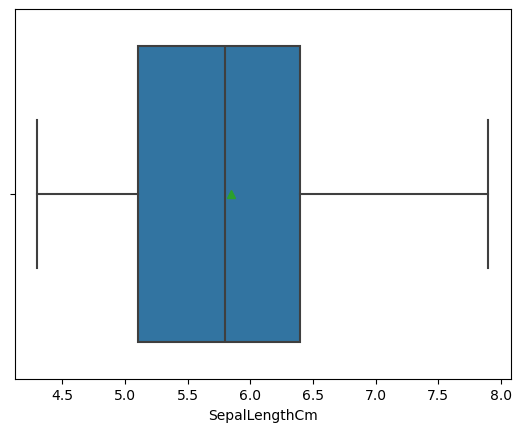

In [20]:
#using box plot

sns.boxplot(x='SepalLengthCm',data=df,showmeans=True)

<Axes: xlabel='SepalWidthCm'>

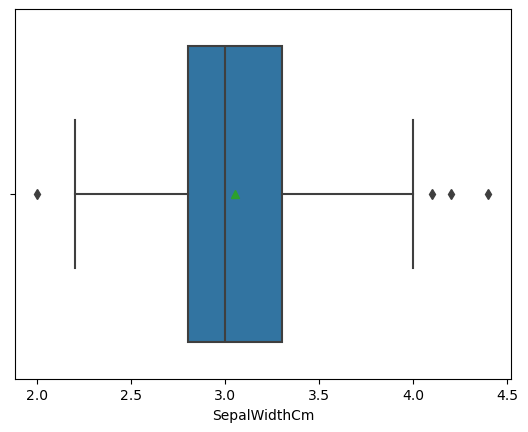

In [21]:

sns.boxplot(x='SepalWidthCm',data=df,showmeans=True)

<Axes: xlabel='PetalLengthCm'>

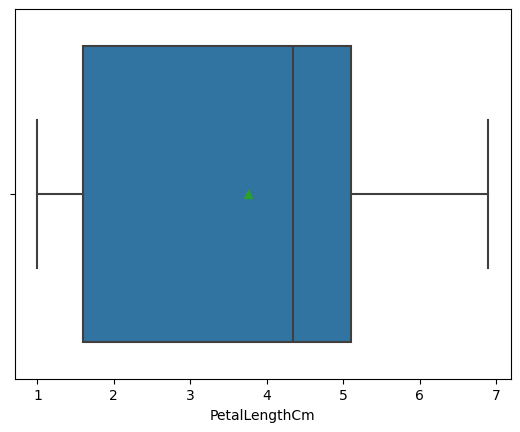

In [22]:
sns.boxplot(x='PetalLengthCm',data=df,showmeans=True)

<Axes: xlabel='PetalWidthCm'>

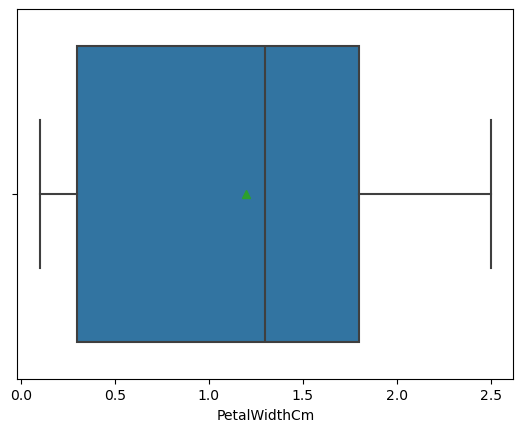

In [23]:
sns.boxplot(x='PetalWidthCm',data=df,showmeans=True)

SepalWidth has most outliers

In [34]:
#using iqr detect outliers
def detect_outliers(df,feature):
    q1=df[feature].quantile(0.25)
    q3=df[feature].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr

    return df[(df[feature]<lower_limit) | (df[feature]>upper_limit)]

In [35]:
#using z score treatment 

In [64]:



def trim(col: pd.core.series.Series):
    lower_limit = col.mean() - 3 * col.std()
    upper_limit = col.mean() + 3 * col.std()
    new_col = col[(col < upper_limit) & (col > lower_limit)]
    return new_col


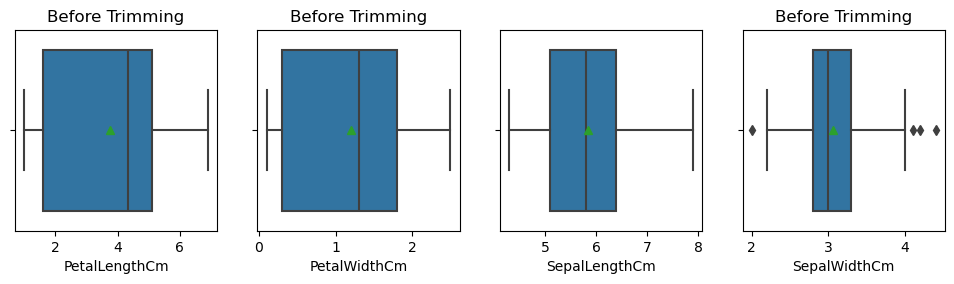

In [65]:
plt.figure(figsize=(12,12))
plt.subplot(4,4,1)
plt.title('Before Trimming')
sns.boxplot(x='PetalLengthCm',data=df,showmeans=True)
plt.subplot(4,4,2)
plt.title('Before Trimming')
sns.boxplot(x='PetalWidthCm',data=df,showmeans=True)
plt.title('Before Trimming')
plt.subplot(4,4,3)
sns.boxplot(x='SepalLengthCm',data=df,showmeans=True)
plt.subplot(4,4,4)
plt.title('Before Trimming')
sns.boxplot(x='SepalWidthCm',data=df,showmeans=True)


plt.show()


<Axes: title={'center': 'After Trimming'}, xlabel='SepalWidthCm'>

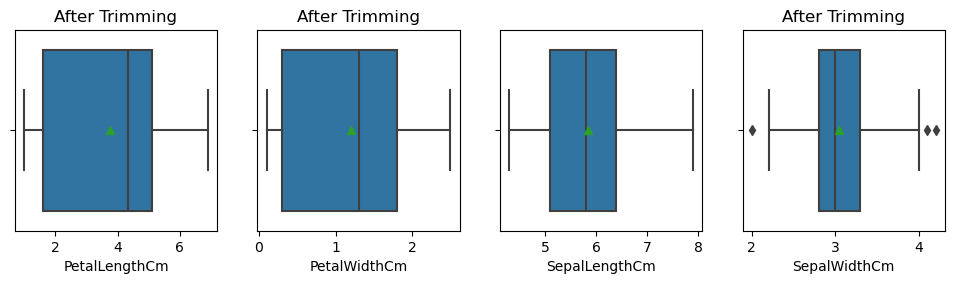

In [67]:
plt.figure(figsize=(12,12))
plt.subplot(4,4,1)
plt.title('After Trimming')
sns.boxplot(x=trim(df['PetalLengthCm']),data=df,showmeans=True)
plt.subplot(4,4,2)
plt.title('After Trimming')
sns.boxplot(x=trim(df['PetalWidthCm']),data=df,showmeans=True)
plt.title('After Trimming')
plt.subplot(4,4,3)
sns.boxplot(x=trim(df['SepalLengthCm']),data=df,showmeans=True)
plt.subplot(4,4,4)
plt.title('After Trimming')
sns.boxplot(x=trim(df['SepalWidthCm']),data=df,showmeans=True)


In [68]:
#group by 

In [70]:
g=df.groupby(df['Species'])

In [71]:
for Species,Species_df in g:
    print(Species)
    print(Species_df)

Iris-setosa
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8         

In [72]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
#statistical details of individual species based on mean, mode ,median , percentile 
g.agg({'SepalLengthCm':'mean','SepalWidthCm':'mean','PetalLengthCm':'mean','PetalWidthCm':'mean'})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [76]:
g.agg({'SepalLengthCm':'median','SepalWidthCm':'median','PetalLengthCm':'median','PetalWidthCm':'median'})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [78]:
g.agg({'SepalLengthCm':'std','SepalWidthCm':'std','PetalLengthCm':'std','PetalWidthCm':'std'})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [79]:
g.agg({'SepalLengthCm':'min','SepalWidthCm':'min','PetalLengthCm':'min','PetalWidthCm':'min'})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [80]:
g.agg({'SepalLengthCm':'max','SepalWidthCm':'max','PetalLengthCm':'max','PetalWidthCm':'max'})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


In [82]:
g.agg({'SepalLengthCm':lambda x:x.quantile(0.25),
       'SepalWidthCm': lambda x:x.quantile(0.25),'PetalLengthCm':lambda x:x.quantile(0.25),'PetalWidthCm':lambda x:x.quantile(0.25)})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.800,3.125,1.4,0.2
Iris-versicolor,5.600,2.525,4.0,1.2
Iris-virginica,6.225,2.800,5.1,1.8


In [84]:
.value_count(df['SepalWidthCm'])

AttributeError: module 'pandas' has no attribute 'value_count'